# Shi2020
# Simulating nonnative cubic interactions on noisy quantum machines

### Implement gate $U(0.2,\pi/2,2)$

In [1]:
# importpackages
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.quantum_info import Statevector
from numpy import pi
import numpy as np
import matplotlib.pyplot as plt

# Import from QASM
IBM experience allows to see the QASM or Qiskit code of the circuit.
QASM is a sort of pseudocode that many quantum languages can interpret.

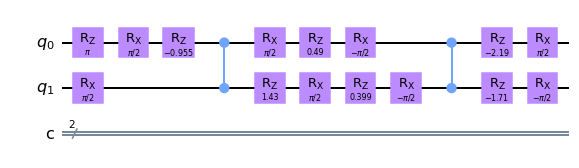

In [2]:
# import from qasm file
newqc = QuantumCircuit.from_qasm_file('Shi2020_qasm.txt')
# draw
newqc.draw('mpl')
# brew install poppler
#newqc.draw('latex')

# Create in Qiskit

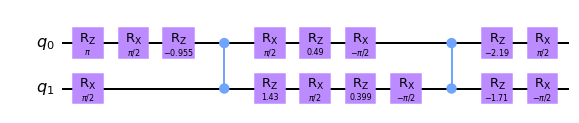

In [3]:
# create quantum register (bundle of qubits)
qreg_q = QuantumRegister(2, 'q')

# we could add a classical register to record
creg_c = ClassicalRegister(2, 'c')

# and then add both the quantum and classical to the circuit
#circuit = QuantumCircuit(qreg_q, creg_c)

circuit = QuantumCircuit(qreg_q)

# add individual gates
circuit.rz(pi, qreg_q[0])
circuit.rx(pi/2, qreg_q[1])
circuit.rx(pi/2, qreg_q[0])
circuit.rz(-0.955316618124509, qreg_q[0])
circuit.cz(qreg_q[0], qreg_q[1])
circuit.rx(pi/2, qreg_q[0])
circuit.rz(1.427466598294886, qreg_q[1])
circuit.rz(0.489897485566355, qreg_q[0])
circuit.rx(pi/2, qreg_q[1])
circuit.rx(-pi/2, qreg_q[0])
circuit.rz(0.39864643091, qreg_q[1])
circuit.rx(-pi/2, qreg_q[1])
circuit.cz(qreg_q[0], qreg_q[1])
circuit.rz(-2.186276035465, qreg_q[0])
circuit.rz(-1.714126055294, qreg_q[1])
circuit.rx(pi/2, qreg_q[0])
circuit.rx(-pi/2, qreg_q[1])

# draw
circuit.draw('mpl')

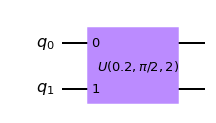

In [4]:
# we can convert the previous circuit to a custom gate
U_shi = circuit.to_gate()
U_shi.label = "$U(0.2,\pi/2,2)$"
# we can then add the new gate to a circuit many times
qc_shi = QuantumCircuit(2)
qc_shi.append(U_shi,[0,1])
qc_shi.draw('mpl')

In [5]:
# With Statevector we can impose an initial wavefunction
# without having to worry about state preparation
# which is usually non-trivial
psi0 = Statevector.from_label('00')
psi = psi0
tdim = 100
# occupation coefficients
alpha0 = np.zeros(tdim)
alpha1 = np.zeros(tdim)
alpha2 = np.zeros(tdim)
# evolve state in time
for t in range(tdim):
    # run circuit 1 time step
    psi = psi.evolve(qc_shi)
    alpha0[t] = np.abs(psi.data[0])**2
    alpha1[t] = np.abs(psi.data[2])**2
    alpha2[t] = np.abs(psi.data[1])**2
# instead of saving the amplitude^2
# we could have saved the entire wavefunction

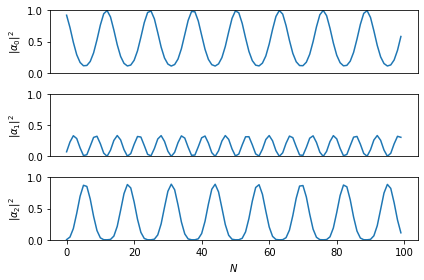

In [6]:
# plot reproducing FIG2
plt.subplot(311)
plt.plot(alpha0)
plt.ylim([0,1])
plt.xticks([])
plt.ylabel(r'$|\alpha_0|^2$')

plt.subplot(312)
plt.plot(alpha1)
plt.ylim([0,1])
plt.xticks([])
plt.ylabel(r'$|\alpha_1|^2$')

plt.subplot(313)
plt.plot(alpha2)
plt.ylim([0,1])
plt.xlabel(r'$N$')
plt.ylabel(r'$|\alpha_2|^2$')

plt.tight_layout()
plt.show()